Delta-X Workshop

Above and Belowground biomass
https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=2000
https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1999

Castañeda-Moya, E., and E. Solohin. 2021. Delta-X: Aboveground Biomass and Necromass across Wetlands in the MRD, LA, USA, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/2000
Castañeda-Moya, E., and E. Solohin. 2021. Delta-X: Belowground Biomass and Necromass across Wetlands in the MRD, LA, USA, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1999

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

field_path = "C:\\Users\\Lena\\Documents\\Untitled Folder\\"
#for mac:
# field_path = "Users/Alchrist/Documents/FieldData"

In [117]:
AGB_file = pd.read_csv(field_path + "\DeltaX_AGB_AGN_2000\data\DeltaX_Aboveground_Biomass_Necromass_Spring2021.csv")
AGB_file = AGB_file.replace(-9999,np.nan)

# We will exclude the dead biomass for now.


,basin,campaign_id,date_collected,latitude,longitude,site_id,hydrogeomorphic_zone,sampling_station,quadrat_id,species,vegetation_class,total_dry_mass,total_carbon,total_nitrogen,total_phosphorus
0,Atchafalaya,Spring_2021,2021-03-29,29.51000,-91.44487,Mike Island,Supratidal,1,A,C. esculenta,AGB,341.1,297.2,33.4,4.45
1,Atchafalaya,Spring_2021,2021-03-29,29.50997,-91.44493,Mike Island,Supratidal,1,B,C. esculenta,AGB,136.3,179.8,21.6,4.75
2,Atchafalaya,Spring_2021,2021-03-29,29.50989,-91.44450,Mike Island,Supratidal,1,C,C. esculenta,AGB,60.8,340.6,42.7,5.49
3,Atchafalaya,Spring_2021,2021-03-29,29.50961,-91.44520,Mike Island,Supratidal,2,A,C. esculenta,AGB,241.2,312.0,33.3,3.83
4,Atchafalaya,Spring_2021,2021-03-29,29.50955,-91.44530,Mike Island,Supratidal,2,B,C. esculenta,AGB,173.2,378.2,46.4,5.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Terrebonne,Spring_2021,2021-03-25,29.17178,-90.82228,CRMS0421,Intertidal,1,A,S. patens,AGB,2.3,NaN,NaN,NaN
119,Terrebonne,Spring_2021,2021-03-25,29.17178,-90.82228,CRMS0421,Intertidal,1,A,S. alterniflora,AGB,305.4,410.6,14.8,1.33
121,Terrebonne,Spring_2021,2021-03-25,29.17178,-90.82192,CRMS0421,Intertidal,2,A,J. roemerianus,AGB,195.0,441.5,10.6,0.93
122,Terrebonne,Spring_2021,2021-03-25,29.17178,-90.82192,CRMS0421,Intertidal,2,A,S. alterniflora,AGB,161.0,409.3,13.3,1.18


In [ ]:

#Rows can represent different plant species. Therefore, we need to sum biomass, C, N, and P for each plot to get total values
AGB_file = AGB_file.groupby(['site_id','hydrogeomorphic_zone','sampling_station','quadrat_id','vegetation_class']).sum()
AGB_file = AGB_file.reset_index()

AGB_file

In [122]:
AGB_live = AGB_file[AGB_file['vegetation_class']=='AGB']
agb_live_means = AGB_live.groupby(['site_id','hydrogeomorphic_zone'])[['total_dry_mass','total_carbon','total_nitrogen','total_phosphorus']].agg(np.nanmean)
agb_live_stds = AGB_live.groupby(['site_id','hydrogeomorphic_zone'])[['total_dry_mass','total_carbon','total_nitrogen','total_phosphorus']].agg(np.nanstd,ddof=0)
agb_live_count = AGB_live.groupby(['site_id','hydrogeomorphic_zone'])[['total_dry_mass','total_carbon','total_nitrogen','total_phosphorus']].agg(np.count_nonzero)

agb_live_means

C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


total_dry_mass  total_carbon  \
site_id     hydrogeomorphic_zone                                 
CRMS0294    Intertidal                 65.840000    409.050000   
            Supratidal                 72.666667    389.640000   
CRMS0322    Intertidal                135.200000    407.575000   
            Supratidal                156.562500    416.400000   
CRMS0396    Intertidal                151.354545    418.380000   
            Supratidal                157.918182    424.900000   
CRMS0399    Intertidal                225.475000    396.700000   
            Supratidal                213.900000    402.075000   
CRMS0421    Intertidal                251.383333    425.600000   
            Supratidal                438.150000    420.833333   
Mike Island Supratidal                173.033333    308.616667   

                                  total_nitrogen  total_phosphorus  
site_id     hydrogeomorphic_zone                                    
CRMS0294    Intertidal                 21.850000          3.010000  
            Supratidal                 24.080000          4.260000  
CRMS0322    Intertidal                 13.750000          1.185000  
            Supratidal                 11.575000          1.062500  
CRMS0396    Intertidal                 11.600000          1.340000  
            Supratidal                 12.266667          1.023333  
CRMS0399    Intertidal                 15.175000          1.990000  
            Supratidal                 13.325000          1.642500  
CRMS0421    Intertidal                 11.675000          1.087500  
            Supratidal                 10.766667          1.043333  
Mike Island Supratidal                 36.566667          4.911667

C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


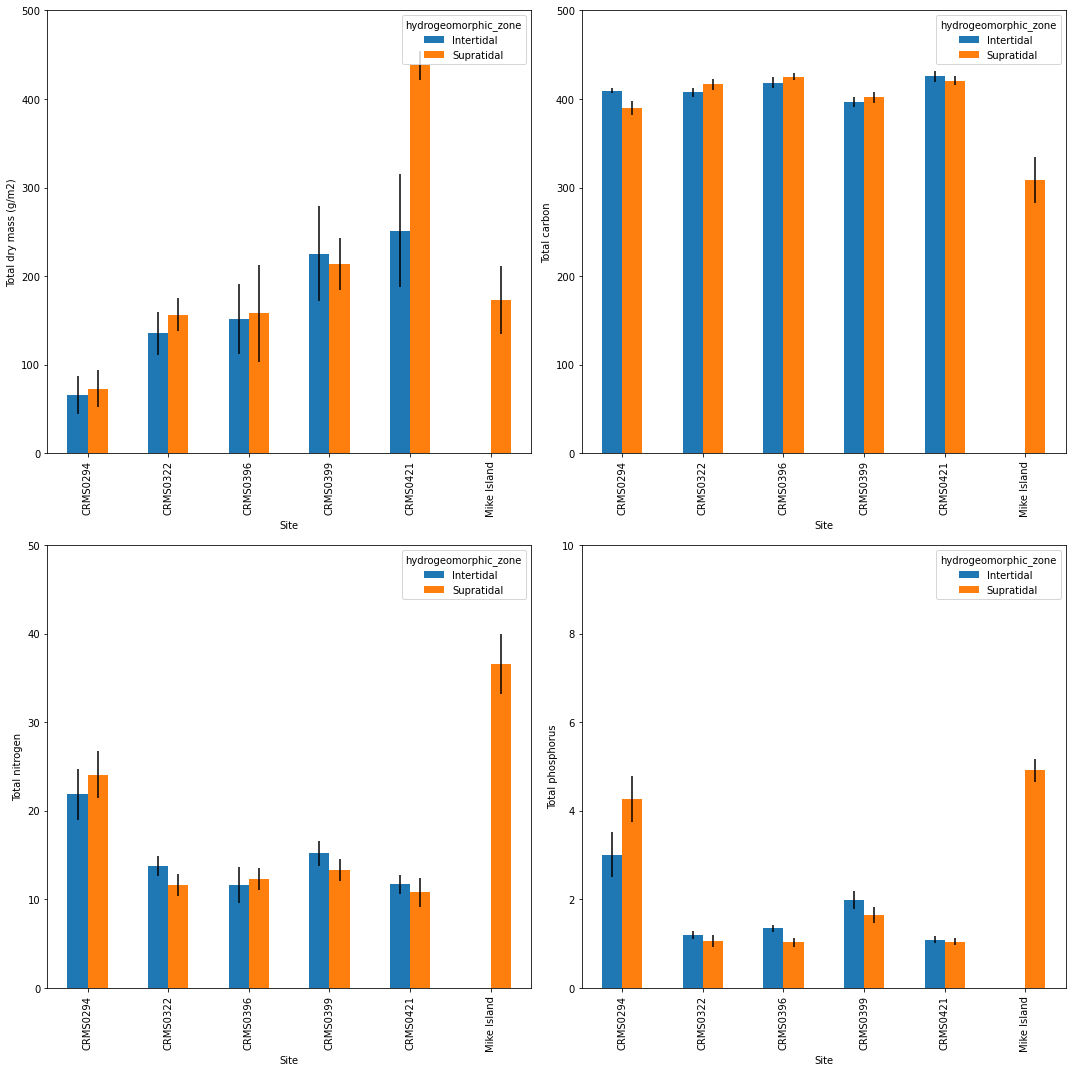

In [121]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,15))
agb_live_means.unstack()['total_dry_mass'].plot(kind='bar', stacked=False,ax = ax1,yerr = agb_live_stds.unstack()['total_dry_mass']/(np.sqrt(agb_live_count.unstack()['total_dry_mass'])))

ax1.set(xlabel='Site', ylabel='Total dry mass (g/m2)',ylim=[0,500])
agb_live_means.unstack()['total_carbon'].plot(kind='bar', stacked=False,ax = ax2,yerr = agb_live_stds.unstack()['total_carbon']/(np.sqrt(agb_live_count.unstack()['total_carbon'])))

ax2.set(xlabel='Site', ylabel='Total carbon',ylim=[0,500])

agb_live_means.unstack()['total_nitrogen'].plot(kind='bar', stacked=False,ax = ax3,yerr=agb_live_stds.unstack()['total_nitrogen']/(np.sqrt(agb_live_count.unstack()['total_nitrogen'])))

ax3.set(xlabel='Site', ylabel='Total nitrogen',ylim=[0,50])

agb_live_means.unstack()['total_phosphorus'].plot(kind='bar', stacked=False,ax = ax4,yerr = agb_live_stds.unstack()['total_phosphorus']/(np.sqrt(agb_live_count.unstack()['total_phosphorus'])))
ax4.set(xlabel='Site', ylabel='Total phosphorus',ylim=[0,10])

plt.tight_layout()

In [140]:
BGB_file = pd.read_csv(field_path + "\DeltaX_BGB_BGN_1999\data\DeltaX_Belowground_Biomass_Necromass_Spring2021.csv")
BGB_file = BGB_file.replace(-9999,np.nan)

BGB_live_file = BGB_file[BGB_file['root_class']=='Biomass']

#Rows can represent different depth segments. Therefore, we need to sum biomass, C, N, and P for each plot to get total values
BGB_live_file = BGB_live_file.groupby(['site','hydrogeomorphic_zone','sampling_station','core_id','depth_interval']).sum()
BGB_live_file = BGB_live_file.reset_index()

BGB_live_file


,site,hydrogeomorphic_zone,sampling_station,core_id,depth_interval,latitude,longitude,root_biomass,total_carbon,total_nitrogen,total_phosphorus
0,CRMS0294,Intertidal,1,C1,0-10cm,29.41993,-90.94773,21.1,467.2,9.2,0.352
1,CRMS0294,Intertidal,1,C1,10-20cm,29.41993,-90.94773,14.7,459.0,12.4,0.447
2,CRMS0294,Intertidal,1,C1,20-30cm,29.41993,-90.94773,52.6,466.4,7.3,0.334
3,CRMS0294,Intertidal,1,C1,30-40cm,29.41993,-90.94773,20.0,468.6,7.2,0.317
4,CRMS0294,Intertidal,1,C1,40-50cm,29.41993,-90.94773,63.1,475.5,4.6,0.285
...,...,...,...,...,...,...,...,...,...,...,...
189,Mike Island,Supratidal,2,C2,0-10cm,29.50955,-91.44530,37.9,0.0,0.0,0.000
190,Mike Island,Supratidal,2,C2,10-20cm,29.50955,-91.44530,50.5,0.0,0.0,0.000
191,Mike Island,Supratidal,2,C2,20-30cm,29.50955,-91.44530,63.1,0.0,0.0,0.000
192,Mike Island,Supratidal,2,C2,30-40cm,29.50955,-91.44530,10.5,0.0,0.0,0.000


In [156]:
bgb_live_means = BGB_live_file.groupby(['site','hydrogeomorphic_zone'])[['root_biomass','total_carbon','total_nitrogen','total_phosphorus']].agg(np.mean)
bgb_live_stds = BGB_live_file.groupby(['site','hydrogeomorphic_zone'])[['root_biomass','total_carbon','total_nitrogen','total_phosphorus']].agg(np.std)
bgb_live_count = BGB_live_file.groupby(['site','hydrogeomorphic_zone'])[['root_biomass','total_carbon','total_nitrogen','total_phosphorus']].agg(np.count_nonzero)

bgb_live_count

root_biomass  total_carbon  total_nitrogen  \
site        hydrogeomorphic_zone                                               
CRMS0294    Intertidal                      16            10              10   
            Supratidal                      15             5               5   
CRMS0322    Intertidal                      19            10              10   
            Supratidal                      20            10              10   
CRMS0396    Intertidal                      20            10              10   
            Supratidal                      19             9               9   
CRMS0399    Intertidal                      19            10              10   
            Supratidal                      20            10              10   
CRMS0421    Intertidal                      13             8               8   
            Supratidal                      10             6               6   
Mike Island Supratidal                      18             9               9   

                                  total_phosphorus  
site        hydrogeomorphic_zone                    
CRMS0294    Intertidal                          10  
            Supratidal                           5  
CRMS0322    Intertidal                          10  
            Supratidal                          10  
CRMS0396    Intertidal                          10  
            Supratidal                           9  
CRMS0399    Intertidal                          10  
            Supratidal                          10  
CRMS0421    Intertidal                           7  
            Supratidal                           5  
Mike Island Supratidal                           9

C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\Lena\Anaconda3\envs\deltax\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


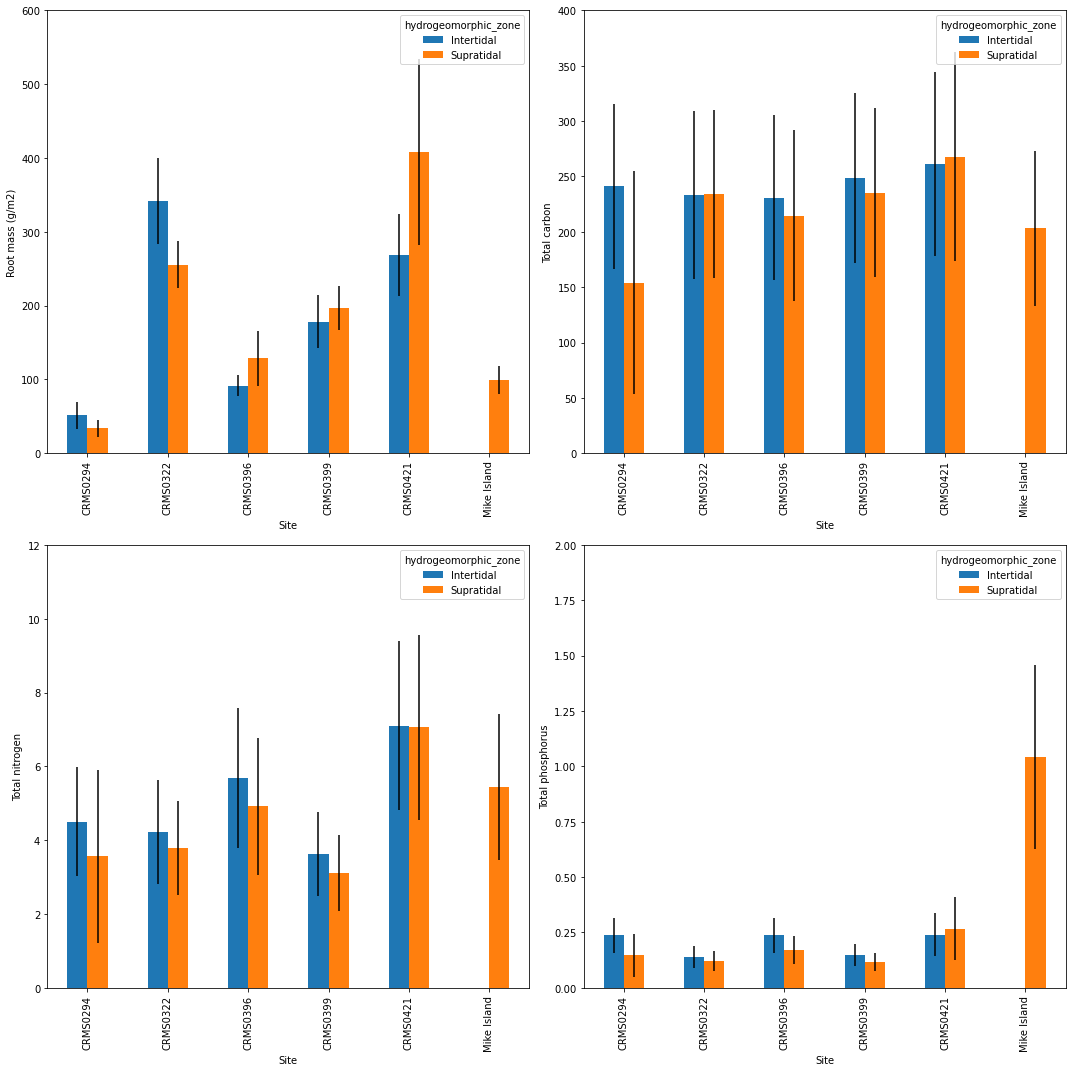

In [157]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,15))
bgb_live_means.unstack()['root_biomass'].plot(kind='bar', stacked=False,ax = ax1,yerr = bgb_live_stds.unstack()['root_biomass']/(np.sqrt(bgb_live_count.unstack()['root_biomass'])))

ax1.set(xlabel='Site', ylabel='Root mass (g/m2)',ylim=[0,600])
bgb_live_means.unstack()['total_carbon'].plot(kind='bar', stacked=False,ax = ax2,yerr = bgb_live_stds.unstack()['total_carbon']/(np.sqrt(bgb_live_count.unstack()['total_carbon'])))

ax2.set(xlabel='Site', ylabel='Total carbon',ylim=[0,400])

bgb_live_means.unstack()['total_nitrogen'].plot(kind='bar', stacked=False,ax = ax3,yerr=bgb_live_stds.unstack()['total_nitrogen']/(np.sqrt(bgb_live_count.unstack()['total_nitrogen'])))

ax3.set(xlabel='Site', ylabel='Total nitrogen',ylim=[0,12])

bgb_live_means.unstack()['total_phosphorus'].plot(kind='bar', stacked=False,ax = ax4,yerr = bgb_live_stds.unstack()['total_phosphorus']/(np.sqrt(bgb_live_count.unstack()['total_phosphorus'])))
ax4.set(xlabel='Site', ylabel='Total phosphorus',ylim=[0,2])

plt.tight_layout()